In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Загрузка таблицы
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#Обзор данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.isna().mean()*100 #проверка на отсутствующие значения в %. Видим, что все данные заполнены

,0
satisfaction_level,0.0
last_evaluation,0.0
number_project,0.0
average_montly_hours,0.0
time_spend_company,0.0
Work_accident,0.0
left,0.0
promotion_last_5years,0.0
department,0.0
salary,0.0


In [20]:
#Расчет основных статистических данных (среднее, медиана, мода, мин/макс, среднее отклонение)
def print_num_desc(column_name, title):
    print(f"-----------------------------------")
    print(f"num column = {column_name}, {title}")

    series = df[column_name]
    print(f"% пустых значений: {series.isna().mean() :.1%}")
    print(f"минимум: {series.min()}")
    print(f"максимум: {series.max()}")
    print(f"разброс: {series.max() - series.min()}")
    print(f"среднее арифметическое: {series.mean()}")
    print(f"медиана: {series.median()}")
    print(f"квантиль 25%: {series.quantile(0.25)}")
    print(f"квантиль 75%: {series.quantile(0.75)}")
    print(f"мода: {series.mode()[0]}")
    print(f"стандартное отклонение: {series.std()}")
    print(f"дисперсия: {series.var()}")

def print_cat_desc(column_name, title):
    print(f"-----------------------------------")
    print(f"cat column = {column_name}, {title}")

    series = df[column_name]

    print(f"% пустых значений: {series.isna().mean() :.1%}")
    print(f"мода: {series.mode()[0]}")

def get_outliers(column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    return q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)

print_num_desc('satisfaction_level', 'Уровень удовлетворенности работой')
print_num_desc('last_evaluation', 'Время с момента последней оценки (в годах)')
print_num_desc('number_project', 'Количество проектов')
print_num_desc('average_montly_hours', 'Среднее количество часов на раб месте в месяц')
print_num_desc('time_spend_company', 'Стаж работы в компании в годах')
print_num_desc('Work_accident', 'Количество несчастных случаев')
print_num_desc('left', 'Увольнение')
print_num_desc('promotion_last_5years', 'Повышение')
print_cat_desc('department', 'Отдел')
print_cat_desc('salary', 'Уровень зарплаты')


-----------------------------------
num column = satisfaction_level, Уровень удовлетворенности работой
% пустых значений: 0.0%
минимум: 0.09
максимум: 1.0
разброс: 0.91
среднее арифметическое: 0.6128335222348156
медиана: 0.64
квантиль 25%: 0.44
квантиль 75%: 0.82
мода: 0.1
стандартное отклонение: 0.24863065106114257
дисперсия: 0.06181720064708763
-----------------------------------
num column = last_evaluation, Время с момента последней оценки (в годах)
% пустых значений: 0.0%
минимум: 0.36
максимум: 1.0
разброс: 0.64
среднее арифметическое: 0.7161017401160078
медиана: 0.72
квантиль 25%: 0.56
квантиль 75%: 0.87
мода: 0.55
стандартное отклонение: 0.17116911062327533
дисперсия: 0.02929886443156307
-----------------------------------
num column = number_project, Количество проектов
% пустых значений: 0.0%
минимум: 2
максимум: 7
разброс: 5
среднее арифметическое: 3.80305353690246
медиана: 4.0
квантиль 25%: 3.0
квантиль 75%: 5.0
мода: 4
стандартное отклонение: 1.2325923553183522
дисперсия: 

In [22]:
#Расчет и визуализация корреляционной матрицы для количественных переменных
data_matrix = df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years']]
matrix_corr = np.round(data_matrix.corr(), decimals=2)
matrix_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.07
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,1.00


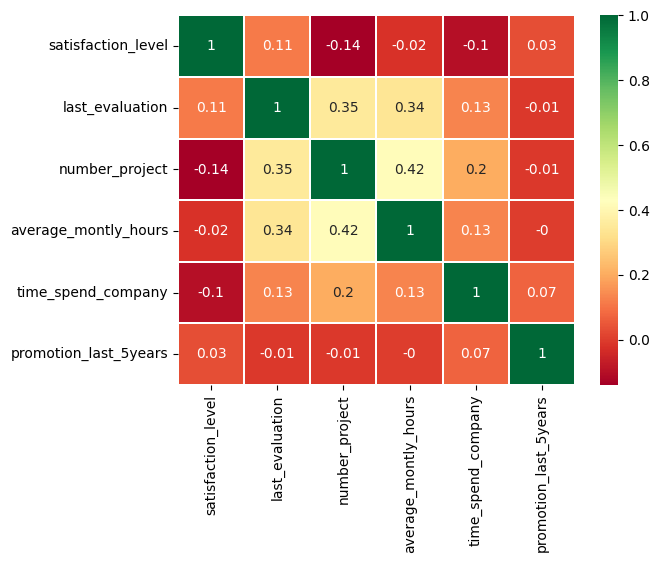

In [23]:
heatmap = sns.heatmap(matrix_corr, annot=True, cmap='RdYlGn', linewidths=0.2)

In [ ]:
#Максимально скоррелированные:
#количество проектов и среднее количество рабочих часов в месяц
#количество проектов и оценка
#Минимально скоррелироанные:
#количество рабочих часов в месяц и повышение за последние 5 лет
#количество проектов и повышение за последние 5 лет

In [26]:
#Сколько сотрудников работает департаментах
department_employee = df['department'].value_counts().reset_index()
department_employee.columns = ['department', 'count_employee']
department_employee

,department,count_employee
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


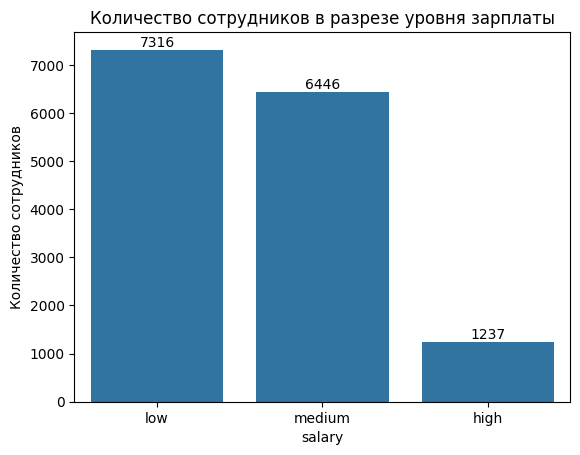

In [30]:
#Распределение сотрудников по зарплатам
ax = sns.countplot(data = df , x = 'salary')
ax.bar_label(ax.containers[0])
plt.title("Количество сотрудников в разрезе уровня зарплаты")
plt.ylabel("Количество сотрудников")
plt.show()

In [32]:
#Распределение сотрудников по зарплатам в разных отделах
depatments_salary = df.pivot_table(
                        index='department',
                        columns='salary',
                        values='left',
                        aggfunc='count')
depatments_salary

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


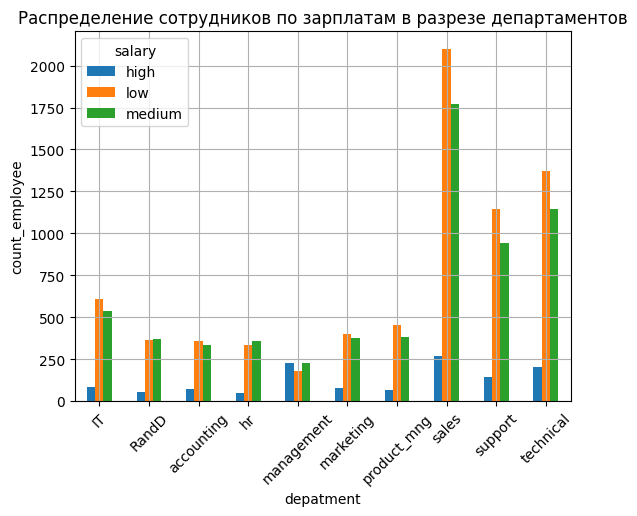

In [33]:
depatments_salary.plot(kind='bar', rot=45, stacked=False)
plt.xlabel('depatment')
plt.ylabel('count_employee')
plt.title('Распределение сотрудников по окладам в разрезе отделов')
plt.grid(True)

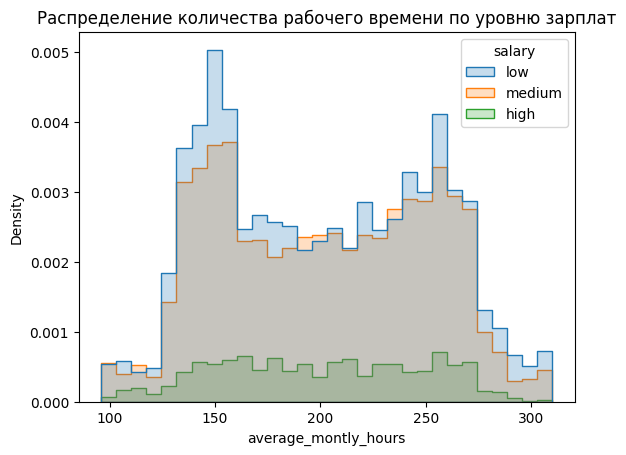

In [34]:
#Проверка гипотезы: СОтрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким
df.groupby('salary')['average_montly_hours'].mean()
sns.histplot(data = df, x = 'average_montly_hours', hue = 'salary', element = 'step', stat = 'density')
plt.title('Распределение количества рабочего времени по уровню зарплат')
plt.show()
#Гипотеза не подтверждена, сотрудники с низким и средним уровнем оклада проводят на рабочем месте больше часов

In [70]:
#Для уволившихся
df_left = df[df['left'] == 1]
#Доля сотрудников с повышением среди уволившихся
left_promo = df_left.pivot_table(
                        index = 'promotion_last_5years',
                        values = 'left',
                        aggfunc = 'count')
left_promo['percent_of'] = left_promo/df_left['promotion_last_5years'].count()*100
left_promo

,left,percent_of
promotion_last_5years,,
0,3552,99.467936
1,19,0.532064


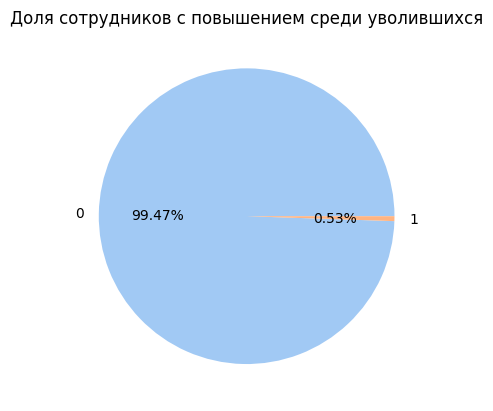

In [44]:
#Доля сотрудников с повышением среди уволившихся (круговая диаграмма)
df_left = df[df['left'] == 1]
promo = df_left['promotion_last_5years'].value_counts(normalize=True)
colors = sns.color_palette('pastel')
plt.pie(promo, labels = promo.index, colors = colors, autopct = '%.2f%%')
plt.title("Доля сотрудников с повышением среди уволившихся")
plt.show()

In [ ]:
#99.47% уволившихся сотрудников не повышали ни разу за 5 лет

In [78]:
#Средняя степень удовлетворенности уволившихся сотрудников
def print_num_desc(column_name, title):
    print(f"-----------------------------------")
    print(f"num column = {column_name}, {title}")

    series = df_left[column_name]
    print(f"среднее арифметическое: {series.mean()}")
print_num_desc('satisfaction_level', 'Уровень удовлетворенности работой')


-----------------------------------
num column = satisfaction_level, Уровень удовлетворенности работой
среднее арифметическое: 0.4400980117614114


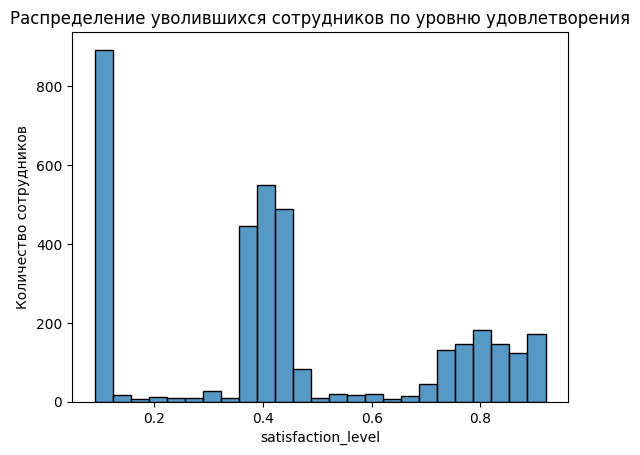

In [79]:
#Распределение уволившихся сотрудников по уровню удовлетворения
sns.histplot(data = df_left, x = 'satisfaction_level', bins = 25)
plt.title('Распределение уволившихся сотрудников по уровню удовлетворения')
plt.ylabel('Количество сотрудников')
plt.show()

In [80]:
#Среднее количество проектов у уволившихся сотрудников
print_num_desc('number_project', 'Количество проектов')

-----------------------------------
num column = number_project, Количество проектов
среднее арифметическое: 3.8555026603192384


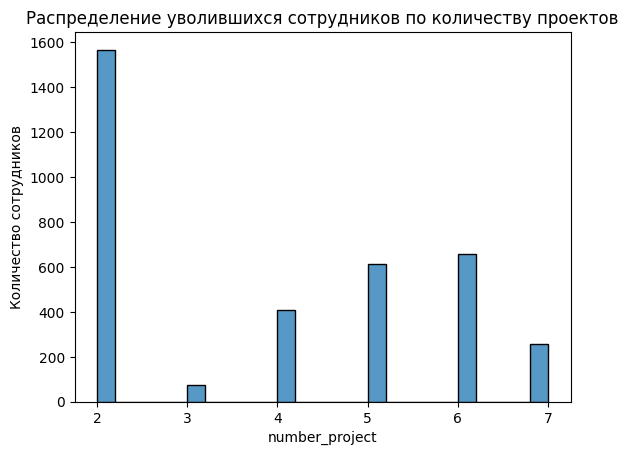

In [81]:
#Распределение уволившихся сотрудников по количеству проектов
sns.histplot(data = df_left, x = 'number_project', bins = 25)
plt.title('Распределение уволившихся сотрудников по количеству проектов')
plt.ylabel('Количество сотрудников')
plt.show()

In [82]:
#Для не уволившихся
df_on = df[df['left'] == 0]
#Доля сотрудников с повышением среди уволившихся
left_promo = df_on.pivot_table(
                        index = 'promotion_last_5years',
                        values = 'left',
                        aggfunc = 'count')
left_promo['percent_of'] = left_promo/df_on['promotion_last_5years'].count()*100
left_promo
#97.37% не уволевшихся сотрудников тоже не имели повышения последние 5 лет

,left,percent_of
promotion_last_5years,,
0,11128,97.374869
1,300,2.625131


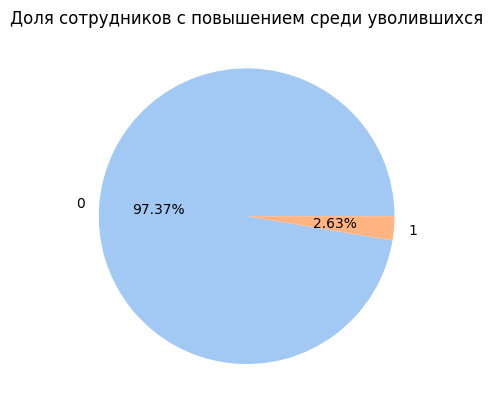

In [83]:
#Доля сотрудников с повышением среди уволившихся (круговая диаграмма)
promo = df_on['promotion_last_5years'].value_counts(normalize=True)
colors = sns.color_palette('pastel')
plt.pie(promo, labels = promo.index, colors = colors, autopct = '%.2f%%')
plt.title("Доля сотрудников с повышением среди уволившихся")
plt.show()

In [84]:
#Средняя степень удовлетворенности неуволившихся сотрудников
def print_num_desc(column_name, title):
    print(f"-----------------------------------")
    print(f"num column = {column_name}, {title}")

    series = df_on[column_name]
    print(f"среднее арифметическое: {series.mean()}")
print_num_desc('satisfaction_level', 'Уровень удовлетворенности работой')


-----------------------------------
num column = satisfaction_level, Уровень удовлетворенности работой
среднее арифметическое: 0.666809590479524


In [85]:
#Среднее количество проектов у неуволившихся сотрудников
print_num_desc('number_project', 'Количество проектов')

-----------------------------------
num column = number_project, Количество проектов
среднее арифметическое: 3.786664333216661
